# Dataset Generation
In this notebook, we generate the 66 time series segmentation datasets from the UCR datasets.

In [9]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 26})

import sktime, os
DATA_PATH = os.path.join(os.path.dirname(sktime.__file__), "datasets/data")

import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys
sys.path.append("../../")

from tqdm import tqdm

In order to run this notebook, you must first download the UCR datasets from https://www.cs.ucr.edu/~eamonn/time_series_data_2018 and place them into the DATA_PATH folder.

In [10]:
DATA_PATH

'/Users/ermshaua/miniconda3/envs/py3k/lib/python3.8/site-packages/sktime/datasets/data'

In [11]:
from tssb.utils import generate_time_series_segmentation_dataset, load_time_series_segmentation_datasets, visualize_time_series
from sktime.utils.data_io import load_from_ucr_tsv_to_dataframe

Let's create an example TS for the ArrowHead dataset and visualize it.

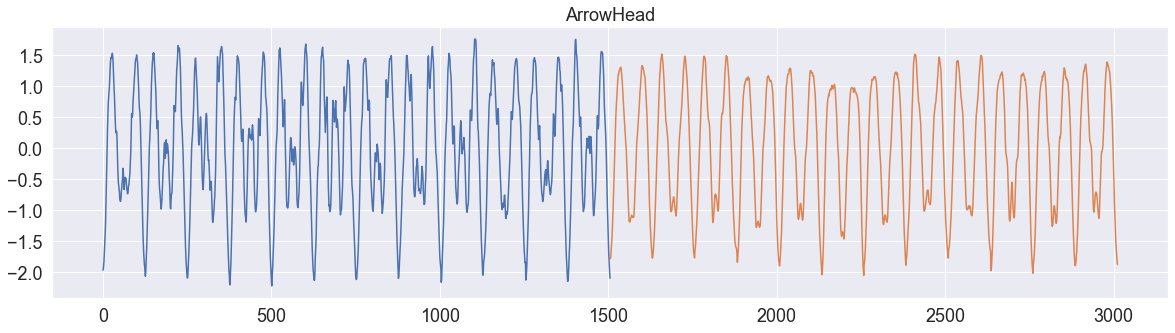

In [12]:
df = load_from_ucr_tsv_to_dataframe(os.path.join(DATA_PATH, "ArrowHead/ArrowHead_TRAIN.tsv"), return_separate_X_and_y=False)
ts, cps = generate_time_series_segmentation_dataset(df, labels=[0,1], resample_rate=2)
fig, ax = visualize_time_series(ts, "ArrowHead", cps_true=cps)

Let's now load the properties for the entire TSSB dataset (labels, resample_rates, label_cuts) and re-create it.

In [13]:
prop_filename = os.path.join("../datasets", "properties.txt")
prop_file = []

with open(prop_filename, 'r') as file:
    for line in file.readlines():
        line = line.split(",")
        
        ds_name, label_cut, resample_rate, labels = line[0], int(line[1]), int(line[2]), line[3:]
        labels = [int(l.replace("\n", "")) for l in labels]
        
        prop_file.append((ds_name, label_cut, resample_rate, labels))
        
prop_file = pd.DataFrame.from_records(prop_file, columns=["Dataset", "Label Cut", "Resample Rate", "Labels"])
prop_file

,Dataset,Label Cut,Resample Rate,Labels
0,Adiac,0,4,"[0, 1, 2, 4]"
1,ArrowHead,0,4,"[0, 1]"
2,Beef,0,4,"[0, 1]"
3,BeetleFly,0,4,"[0, 1]"
4,BirdChicken,0,4,"[0, 1]"
5,Car,0,16,"[0, 1, 2, 3]"
6,CBF,0,4,"[1, 0, 2]"
7,ChlorineConcentration,0,8,"[0, 2]"
8,CinCECGTorso,0,8,"[1, 2, 3]"
9,Coffee,0,8,"[0, 1]"


In [14]:
tssb = []

for _, (dataset, label_cut, resample_rate, labels) in tqdm(prop_file.iterrows()):
    df = load_from_ucr_tsv_to_dataframe(os.path.join(DATA_PATH, f"{dataset}/{dataset}_TRAIN.tsv"), return_separate_X_and_y=False)
    ts, cps = generate_time_series_segmentation_dataset(df, labels=labels, resample_rate=resample_rate, label_cut=label_cut)
    tssb.append((dataset, cps, ts))
    
tssb = pd.DataFrame.from_records(tssb, columns=["name", "change points", "time_series"])
tssb

66it [00:50,  1.32it/s]


,name,change points,time_series
0,Adiac,"[572, 1012, 1232]","[1.6811456620860454, 1.3833939713969472, 1.029..."
1,ArrowHead,[753],"[-1.9577206309715158, -1.858081924599624, -1.6..."
2,Beef,[705],"[-0.3808184611459132, -0.3522382904977103, -0...."
3,BeetleFly,[1280],"[1.1148051937755514, 0.7744033379924569, 0.477..."
4,BirdChicken,[1280],"[1.697714230537119, 1.4390320886416765, 1.2228..."
5,Car,"[577, 1154, 1550]","[1.4516478867009353, 1.0301743848837297, 0.531..."
6,CBF,"[384, 704]","[-1.2771304421352372, -0.6898106156588633, -0...."
7,ChlorineConcentration,[2365],"[2.4962273725836015, 1.0467432663502947, 0.391..."
8,CinCECGTorso,"[2663, 5121]","[-0.11821460735609512, -0.11532619232132582, -..."
9,Coffee,[500],"[-0.6443794351448959, -0.9354437755240335, -0...."


Now, let's load the reference benchmark to compare it to the generated one (they should match).

In [15]:
tssb_ref = load_time_series_segmentation_datasets()
tssb_ref

,name,window_size,change points,time_series
0,Adiac,10,"[572, 1012, 1232]","[1.681146, 1.383394, 1.029389, 0.688386, 0.354..."
1,ArrowHead,10,[753],"[-1.957721, -1.858082, -1.657983, -1.420794, -..."
2,Beef,50,[705],"[-0.380818, -0.352238, -0.295392, -0.225041, -..."
3,BeetleFly,10,[1280],"[1.114805, 0.774403, 0.477129, 0.115781, -0.24..."
4,BirdChicken,20,[1280],"[1.697714, 1.439032, 1.22287, 0.99708, 0.76479..."
5,Car,20,"[577, 1154, 1550]","[1.451648, 1.030174, 0.531853, 0.040229, -0.40..."
6,CBF,20,"[384, 704]","[-1.27713, -0.689811, -0.901181, -0.937038, -0..."
7,ChlorineConcentration,10,[2365],"[2.496227, 1.046743, 0.391124, 0.607525, -0.22..."
8,CinCECGTorso,10,"[2663, 5121]","[-0.118215, -0.115326, -0.111855, -0.1229, -0...."
9,Coffee,10,[500],"[-0.644379, -0.935444, -0.98246, -1.069437, -0..."


Lastly, let's assert that the generated and reference benchmark datasets match.

In [16]:
for idx in range(tssb.shape[0]):
    assert np.array_equal(tssb["change points"].iloc[idx], tssb_ref["change points"].iloc[idx])
    assert np.allclose(tssb.time_series.iloc[idx], tssb_ref.time_series.iloc[idx], rtol=1e-03, atol=1e-05)